In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
import os

In [3]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/db/fc/10b7d339ccf6725e13408d76fb1e944f512590a949af426503c38d4af712/yfinance-0.2.41-py2.py3-none-any.whl.metadata
  Obtaining dependency information for multitasking>=0.0.7 from https://files.pythonhosted.org/packages/3e/8a/bb3160e76e844db9e69a413f055818969c8acade64e1a9ac5ce9dfdcf6c1/multitasking-0.0.11-py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/6a/71/3656c00606e75e81f11721e6a1c973c3e03da8c7d8b665d20f78245384c6/frozendict-2.4.4-py311-none-any.whl.metadata
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.1/3.0 MB 1.7 MB/s eta 0:00:02
     -- ------------------------------------- 0.2/3.0 MB 2.1 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 3.6 MB/s eta 0:00:01
     ----------- ---------------------------- 0.8/3.0 MB 4

In [4]:
os.chdir('D:\\R Studio')
import yfinance as yf

# Data Fetching from Yahoo Finance

In [5]:
# Get the data for Suzlon Energy Ltd
ticker = "SUZLON.NS"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,4.591069,4.820623,4.453337,4.682891,4.682891,43011479
2021-04-05,4.682891,4.682891,4.453337,4.545159,4.545159,22124128
2021-04-06,4.545159,4.728801,4.545159,4.682891,4.682891,18657951
2021-04-07,4.774712,4.774712,4.591069,4.636980,4.636980,23653516
2021-04-08,4.728801,4.728801,4.545159,4.591069,4.591069,10129792


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2021-04-01 to 2024-03-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       740 non-null    float64
 1   High       740 non-null    float64
 2   Low        740 non-null    float64
 3   Close      740 non-null    float64
 4   Adj Close  740 non-null    float64
 5   Volume     740 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 40.5 KB


# Selecting the target Variable and cleaning the data

In [8]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


In [9]:
#Plotting the time series

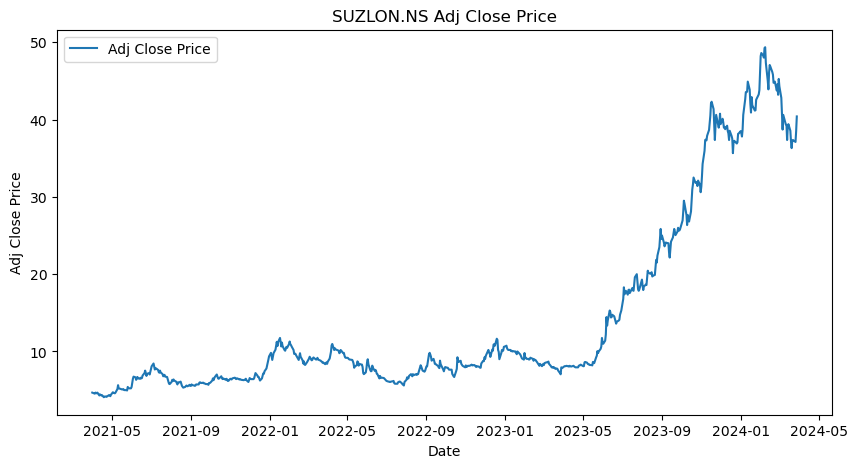

In [10]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('SUZLON.NS Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

In [11]:
#Decomposing the time series

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
df.columns

Index(['Adj Close'], dtype='object')

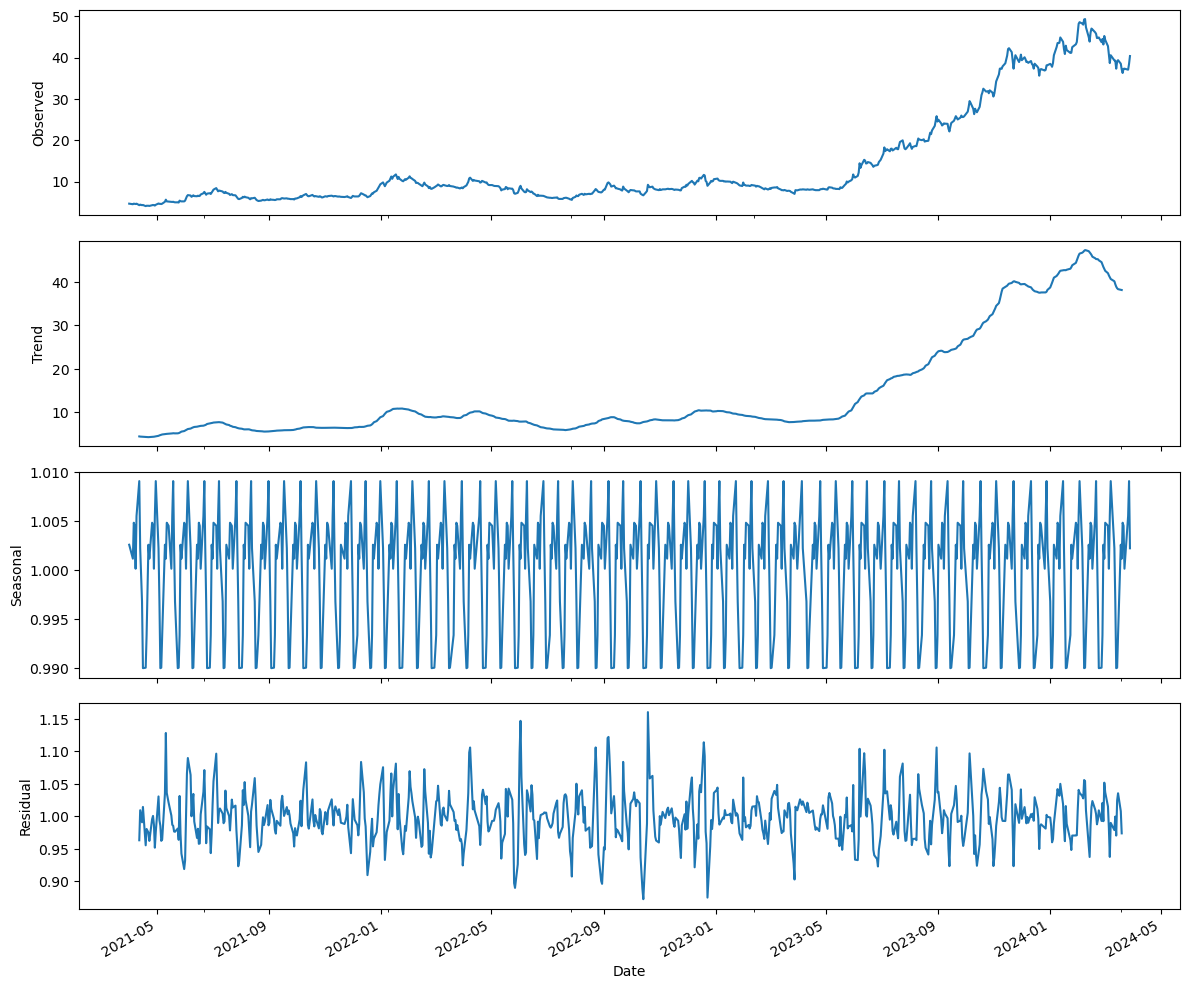

In [15]:
# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [16]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

# Univariate Forecasting- Conventional Models/Statistics Models

In [17]:
#Holt Winters Model

In [18]:
monthly_data = df.resample("M").mean()

In [19]:
# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

In [20]:
len(monthly_data), len(train_data)

(36, 28)

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Fitting the HoltWinters model
holt_winters_model=ExponentialSmoothing(train_data,seasonal='mul',seasonal_periods=12).fit()

#Forecast for the next year/12 months
holt_winters_forecast=holt_winters_model.forecast(12)

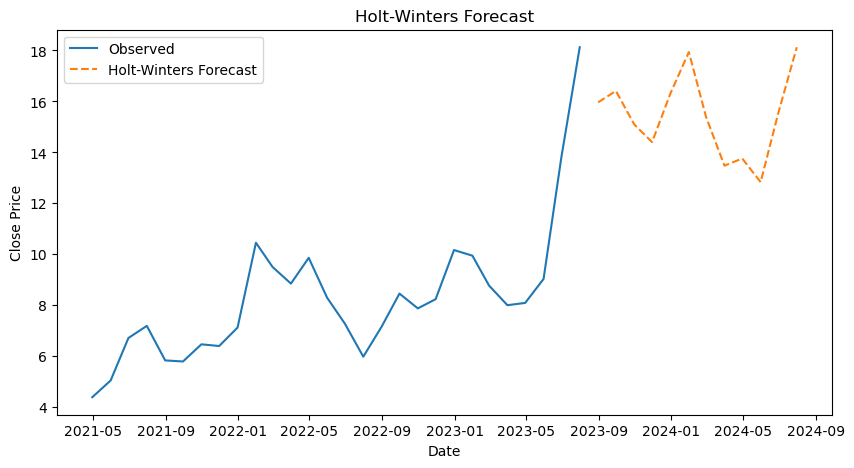

In [22]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [26]:
# Forecast for the next 12 months
y_pred=holt_winters_model.forecast(8)

In [27]:
len(test_data), len(y_pred)

(8, 8)

In [28]:
y_pred,test_data

(2023-08-31    15.965217
 2023-09-30    16.412480
 2023-10-31    15.093872
 2023-11-30    14.404747
 2023-12-31    16.321335
 2024-01-31    17.937495
 2024-02-29    15.393195
 2024-03-31    13.480170
 Freq: M, dtype: float64,
             Adj Close
 Date                 
 2023-08-31  20.745455
 2023-09-30  24.540000
 2023-10-31  29.562500
 2023-11-30  38.237500
 2023-12-31  38.167500
 2024-01-31  41.976190
 2024-02-29  46.238095
 2024-03-31  39.122222)

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#Computing RMSE
rmse=np.sqrt(mean_squared_error(test_data,y_pred))
print(f'RMSE: {rmse}')

#Computing MAE
mae=mean_absolute_error(test_data,y_pred)
print(f'MAE: {mae}')

# Computing MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')

# Computing R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 21.006799560074427
MAE: 19.19761882163668
MAPE: nan
R-squared: -5.367866396336837


In [30]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)

In [31]:
holt_winters_forecast

2023-08-31    15.965217
2023-09-30    16.412480
2023-10-31    15.093872
2023-11-30    14.404747
2023-12-31    16.321335
2024-01-31    17.937495
2024-02-29    15.393195
2024-03-31    13.480170
2024-04-30    13.761680
2024-05-31    12.834478
2024-06-30    15.564872
2024-07-31    18.128571
2024-08-31    15.965217
2024-09-30    16.412480
2024-10-31    15.093872
2024-11-30    14.404747
2024-12-31    16.321335
2025-01-31    17.937495
2025-02-28    15.393195
2025-03-31    13.480170
Freq: M, dtype: float64

# ARIMA Monthly Data

In [35]:
monthly_data.columns

Index(['Adj Close'], dtype='object')

In [36]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 325.1 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/614.7 kB 751.6 kB/s eta 0:00:01
   ------------- -------------------------- 215.0/614.7 kB 1.5 MB/s eta 0:00:01
   --------------------------------- ------ 522.2/614.7 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 2.4 MB/s eta 0:00:01
   -----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [37]:
from pmdarima import auto_arima

In [39]:
#Fitting auto_arima model
arima_model = auto_arima(train_data['Adj Close'], 
                         seasonal=True, 
                         m=12,  # Monthly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

#Printing the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 -48.661
Date:                Sun, 21 Jul 2024   AIC                            101.322
Time:                        16:39:54   BIC                            103.913
Sample:                    04-30-2021   HQIC                           102.092
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.6365      0.178      3.575      0.000       0.288       0.985
sigma2         2.1115      0.447      4.719      0.000       1.234       2.988
Ljung-Box (L1) (Q):                   0.21   Jarque-

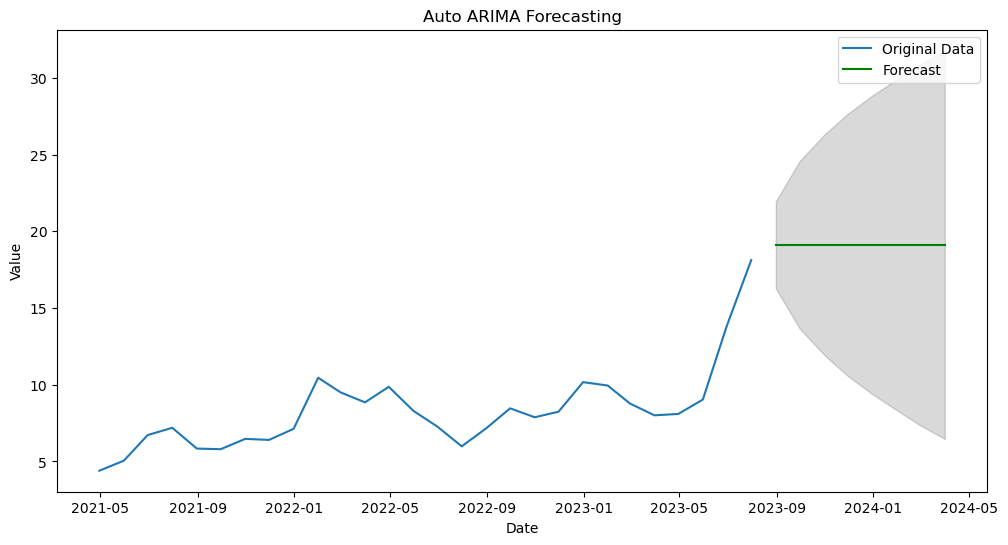

In [40]:
n_periods=8
#Number of periods forecasted

#Generating the forecast
forecast,conf_int=arima_model.predict(n_periods=n_periods,return_conf_int=True)

#Plotting the original data, fitted values, and the forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [41]:
len(forecast)

8

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 17.772420206356905
MAE: 15.702232322230032
MAPE: nan
R-squared: -3.5579263771149066


# ARIMA_Daily data

In [56]:
daily_data= df.copy()

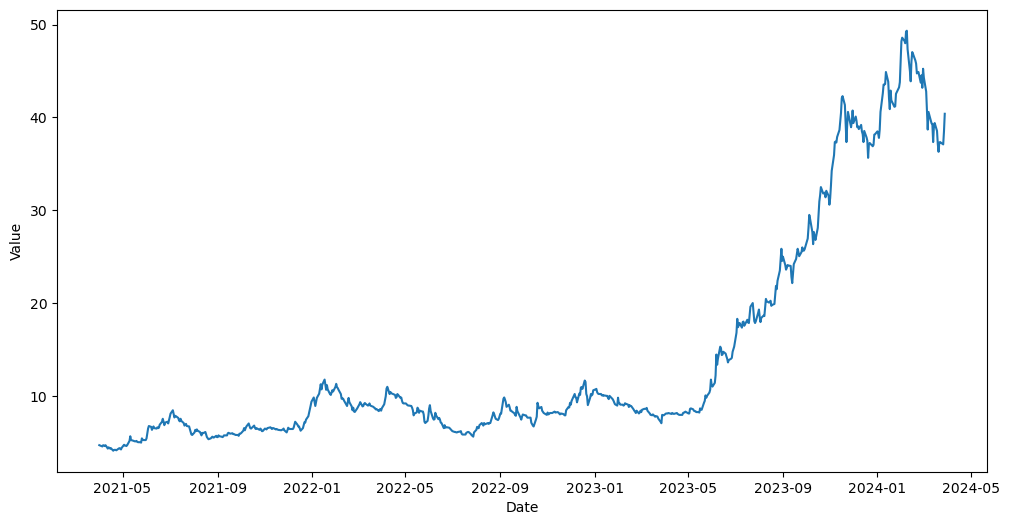

In [57]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [58]:
#Fitting the auto_arima model
arima_model = auto_arima(daily_data['Adj Close'], 
                         seasonal=True, 
                         m=7,  # Weekly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

In [59]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  740
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -637.472
Date:                Mon, 22 Jul 2024   AIC                           1286.944
Time:                        10:00:17   BIC                           1314.576
Sample:                             0   HQIC                          1297.598
                                - 740                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0793      0.039      2.052      0.040       0.004       0.155
ar.L1         -0.0474      0.114     -0.415      0.678      -0.271       0.176
ar.L2         -0.5914      0.065     -9.136      0.0

In [60]:
#Generating in-sample predictions
fitted_values = arima_model.predict_in_sample()

In [61]:
fitted_values

Date
2021-04-01     0.048387
2021-04-05     4.731278
2021-04-06     4.561472
2021-04-07     4.764108
2021-04-08     4.676256
                ...    
2024-03-21    36.494695
2024-03-22    37.587855
2024-03-26    37.242858
2024-03-27    36.991716
2024-03-28    38.929391
Name: predicted_mean, Length: 740, dtype: float64

In [62]:
n_periods = 60 

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

C:\Users\SAMPREETH\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\SAMPREETH\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [63]:
len(forecast)

60

In [64]:
len(future_dates)

8

In [65]:
# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

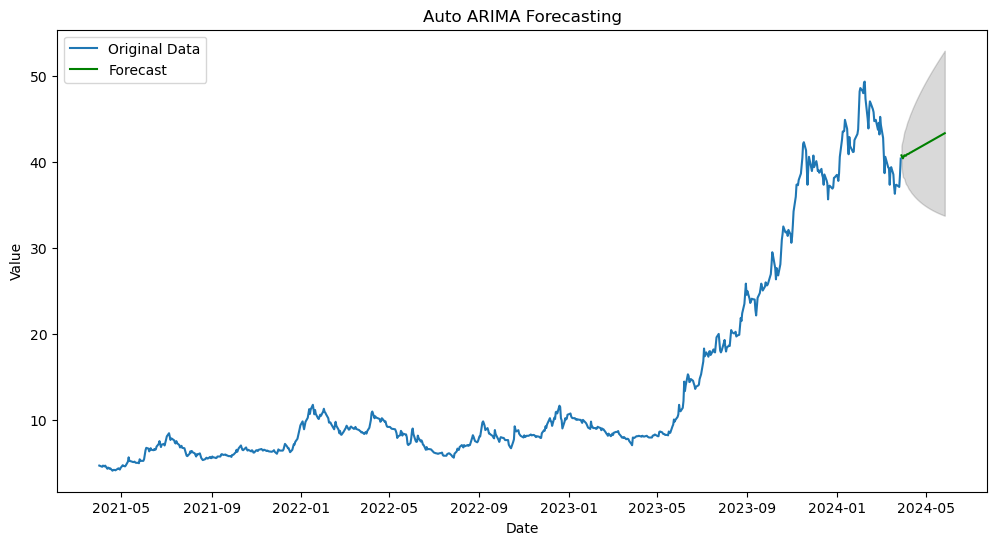

In [66]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates, 
                 conf_int_df['lower_bound'], 
                 conf_int_df['upper_bound'], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

# Multivariate Forecasting- Machine Learning Models

In [67]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/b6/62345568cd07de5d9254fcf64d7e44aacbb6abde11ea953b3cb320e58d19/tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.17.0 from https://files.pythonhosted.org/packages/66/03/5c447feceb72f5a38ac2aa79d306fa5b5772f982c2b480c1329c7e382900/tensorflow_intel-2.17.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for fl

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [69]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,4.591069,4.820623,4.453337,4.682891,4.682891,43011479
2021-04-05,4.682891,4.682891,4.453337,4.545159,4.545159,22124128
2021-04-06,4.545159,4.728801,4.545159,4.682891,4.682891,18657951
2021-04-07,4.774712,4.774712,4.591069,4.636980,4.636980,23653516
2021-04-08,4.728801,4.728801,4.545159,4.591069,4.591069,10129792


In [70]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

In [71]:
import numpy as np

# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (710, 30, 6)
Shape of y: (710,)


In [72]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\SAMPREETH\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0011 - val_loss: 0.1229
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0020 - val_loss: 0.0578
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 6.6663e-04 - val_loss: 0.0075
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 7.7520e-04 - val_loss: 0.0044
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 2.9714e-04 - val_loss: 0.0038
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 4.0064e-04 - val_loss: 0.0106
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 4.9278e-04 - val_loss: 0.0118
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 4.7070e-04 - val_loss: 0.0081
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.5869e-04 - val_loss: 0.0230
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 3.3989e-04 - val_loss: 0.0247
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 3.3712e-04 - val_loss: 0.0405
Epoch 12/20
18/18 ━━━━━━━━━

In [75]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step


In [76]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 23.292338327466492, True Value: 25.850000381469723
Prediction: 23.9543767381283, True Value: 24.54999923706055
Prediction: 24.994408887266214, True Value: 25.000000000000004
Prediction: 25.733968598703537, True Value: 24.100000381469727
Prediction: 26.246260466888995, True Value: 23.60000038146973
Prediction: 26.47366860309648, True Value: 23.799999237060547
Prediction: 26.520465746591068, True Value: 24.100000381469727
Prediction: 26.601193550784952, True Value: 24.049999237060547
Prediction: 26.552540223569846, True Value: 24.000000000000004
Prediction: 26.48357274617501, True Value: 22.799999237060547


In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 9.522353089166812
MAE: 7.892048396871063
MAPE: 15.874211979553134
R-squared: -0.7234199467456521


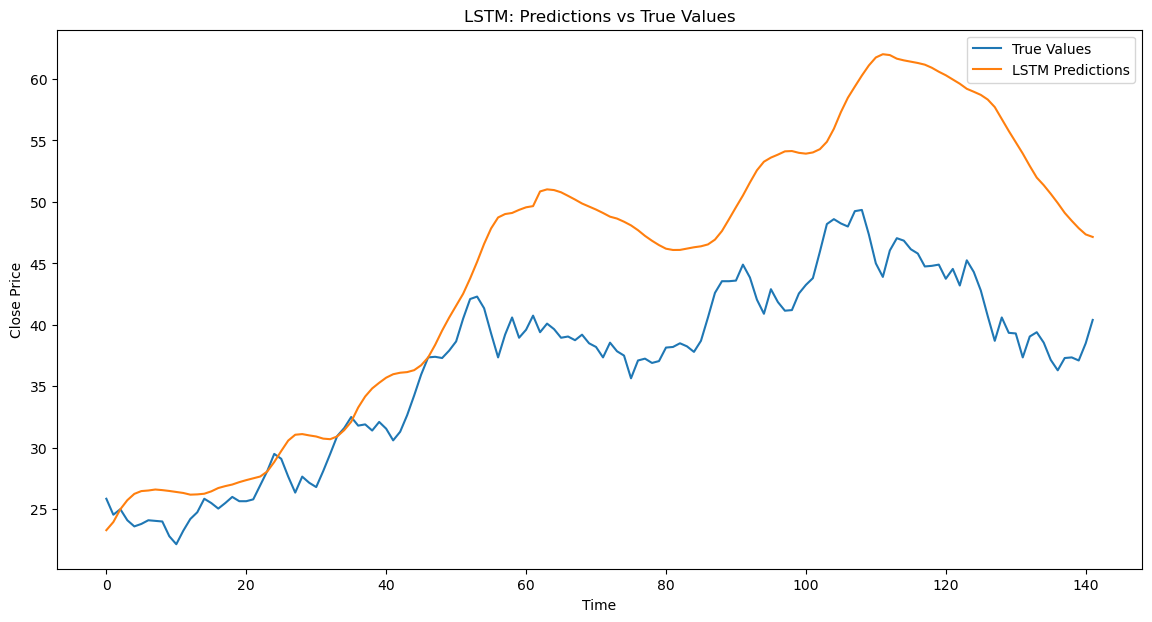

In [78]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Tree based models

In [79]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [80]:
def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.
    
    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]
    
    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [81]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [82]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.0005000418211363496


In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.022361614904481956
MAE: 0.01163983037210079
MAPE: 52790.22061496618
R-squared: 0.9922793854699824


In [85]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.00016329879266576176


In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.012778841601090522
MAE: 0.008601447020185747
MAPE: 52904.64376296166
R-squared: 0.9974786768264212


In [87]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.04361440717390471, True Value: 0.044628677583536794
Prediction: 0.07431848360547975, True Value: 0.07100019282515142
Prediction: 0.8497700762333563, True Value: 0.7613995229263039
Prediction: 0.09635739551877047, True Value: 0.10414355377428265
Prediction: 0.11055743408380074, True Value: 0.09940026995521199
Prediction: 0.1693168326243975, True Value: 0.1582290071729608
Prediction: 0.11664316188750205, True Value: 0.13175935168273656
Prediction: 0.04158581368168614, True Value: 0.04057154327205405
Prediction: 0.052742998879456646, True Value: 0.04665727107575533
Prediction: 0.8387237570699747, True Value: 0.9016878268672859


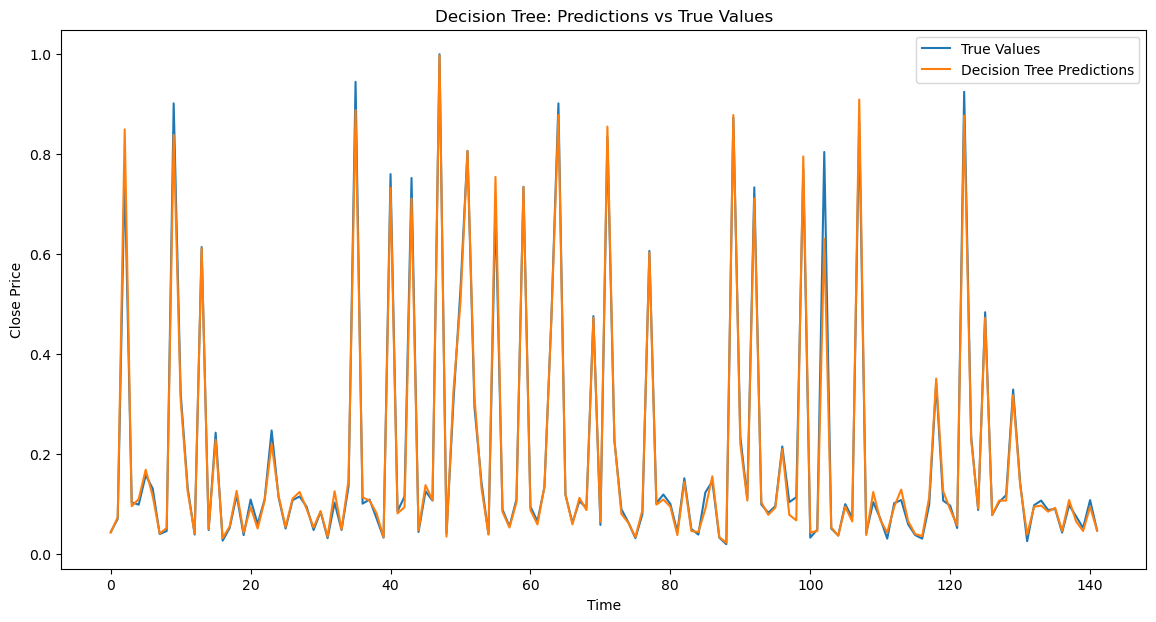

In [88]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [89]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.04317825414776338, True Value: 0.044628677583536794
Prediction: 0.06848573515263191, True Value: 0.07100019282515142
Prediction: 0.7730202705754889, True Value: 0.7613995229263039
Prediction: 0.10019396225515086, True Value: 0.10414355377428265
Prediction: 0.10052615498726077, True Value: 0.09940026995521199
Prediction: 0.15080043317394934, True Value: 0.1582290071729608
Prediction: 0.1187876019579844, True Value: 0.13175935168273656
Prediction: 0.042194390886584415, True Value: 0.04057154327205405
Prediction: 0.049591313180576704, True Value: 0.04665727107575533
Prediction: 0.8837596083896473, True Value: 0.9016878268672859


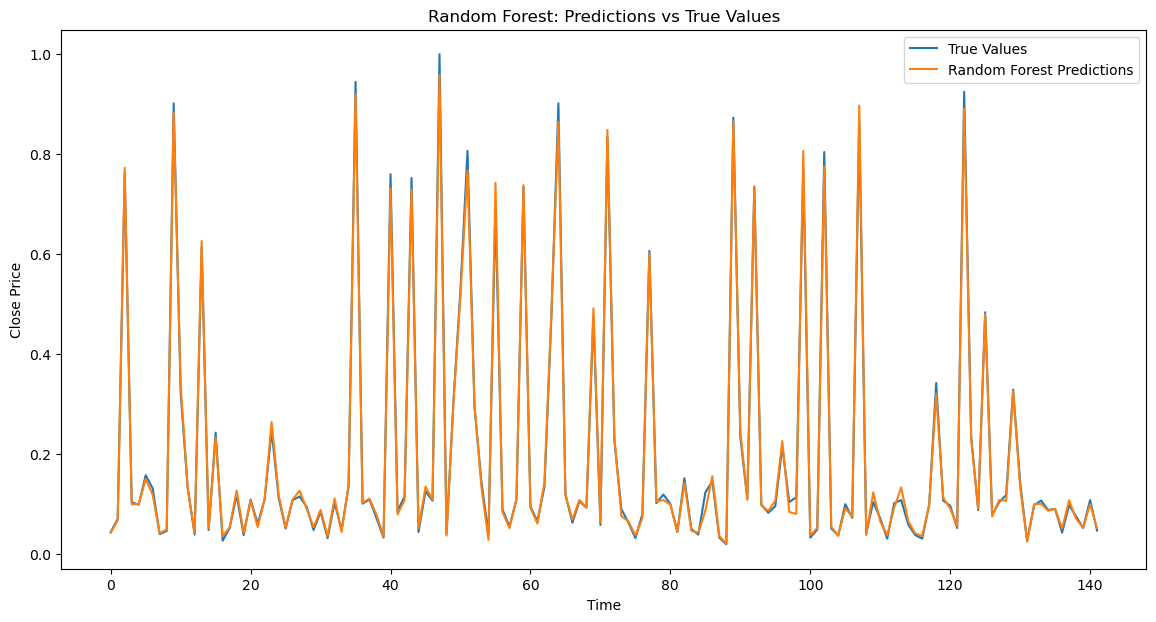

In [90]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

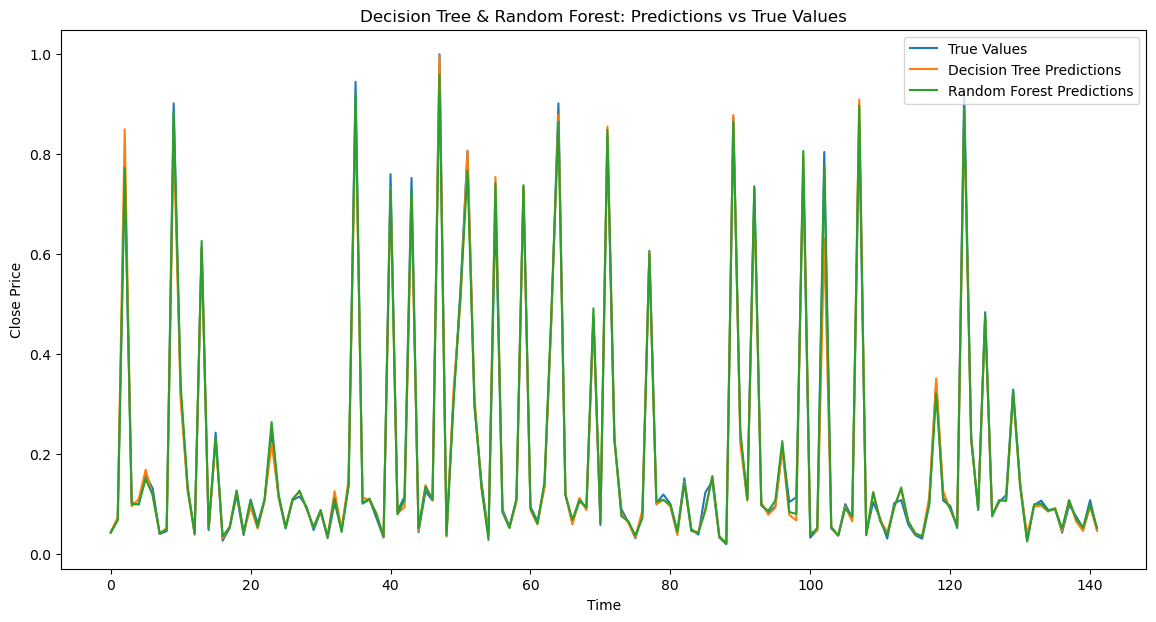

In [91]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()